# Data visualization

## Stance labels distributions

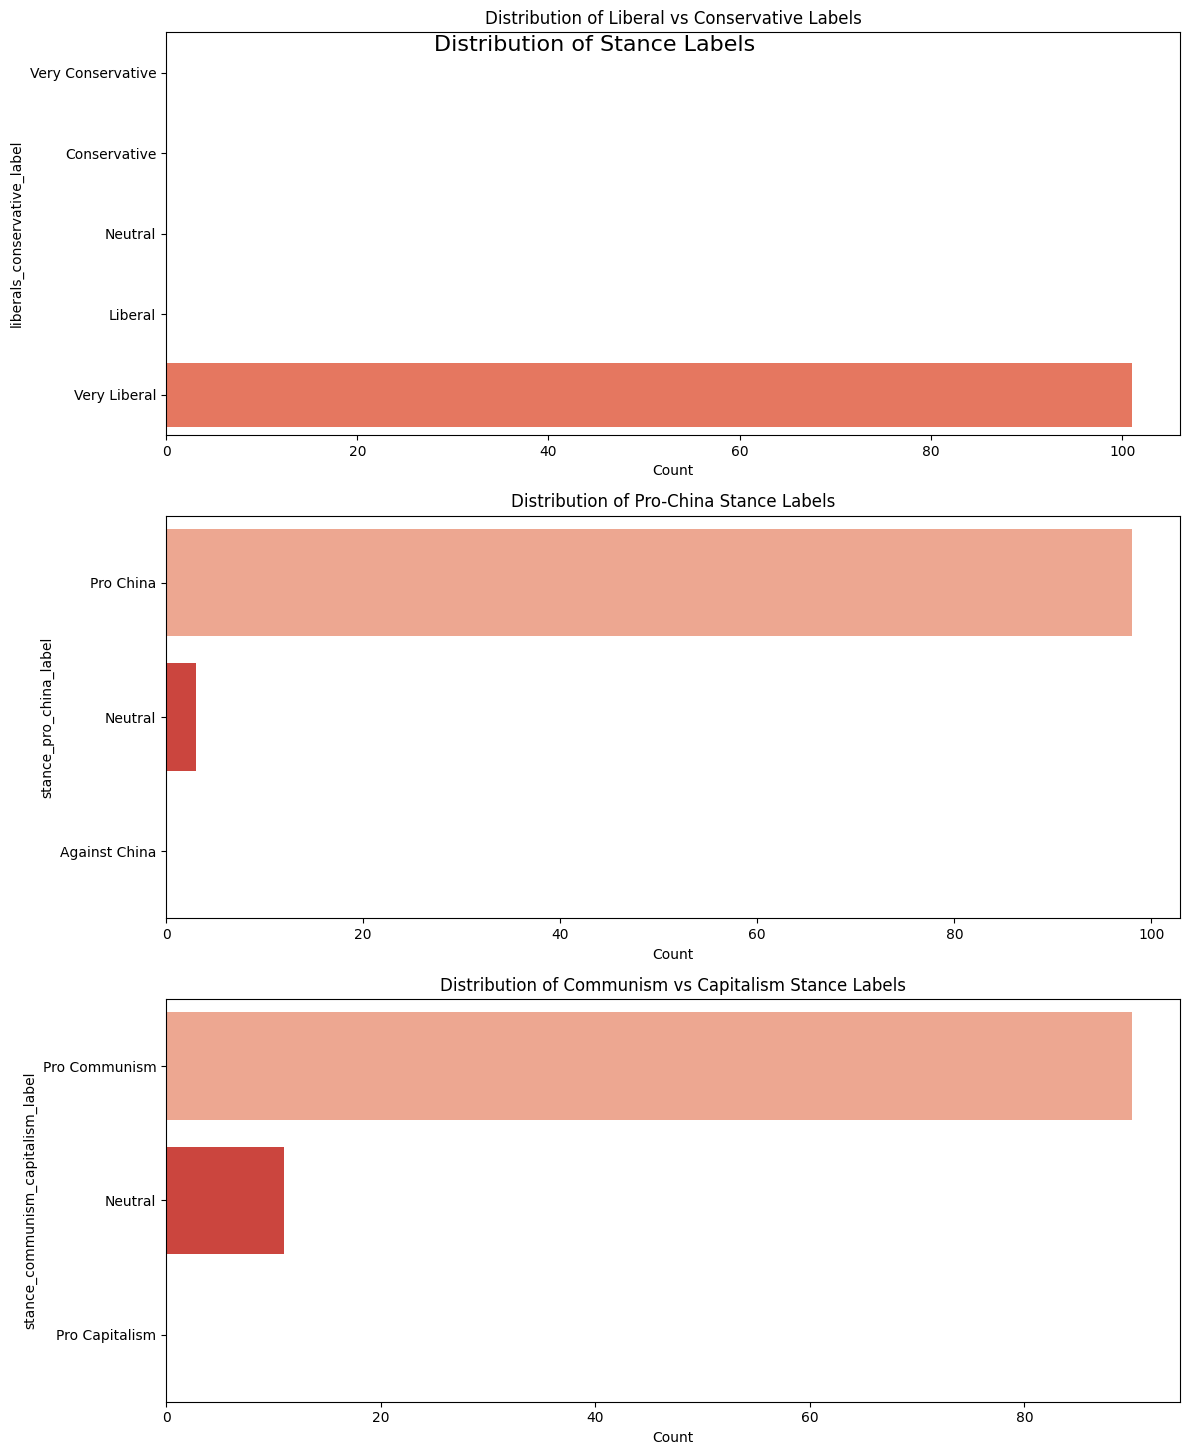

In [18]:
import ast
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO


# Read JSON file line by line and concatenate into a single DataFrame
df = pd.read_json("processed_results.json")

# Extract only the "label" from dictionary columns
df["liberals_conservative_label"] = df["liberals_conservative"].apply(lambda x: x["label"] if isinstance(x, dict) else None)
df["stance_pro_china_label"] = df["stance_pro_china"].apply(lambda x: x["label"] if isinstance(x, dict) else None)
df["stance_communism_capitalism_label"] = df["stance_communism_capitalism"].apply(lambda x: x["label"] if isinstance(x, dict) else None)

fig, axes = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Distribution of Stance Labels', fontsize=16, y=0.95)

# Specify the possible label values as a list
liberals_conservative_labels = ['Very Conservative', 'Conservative', 'Neutral', 'Liberal', 'Very Liberal']
stance_pro_china_labels = ['Pro China', 'Neutral', 'Against China']
stance_communism_capitalism_labels = ['Pro Communism', 'Neutral', 'Pro Capitalism']

sns.countplot(data=df, y='liberals_conservative_label', ax=axes[0], order=liberals_conservative_labels, hue='liberals_conservative_label', palette='Reds', legend=False)
axes[0].set_title('Distribution of Liberal vs Conservative Labels')
axes[0].set_xlabel('Count')

sns.countplot(data=df, y='stance_pro_china_label', ax=axes[1], order=stance_pro_china_labels, hue='stance_pro_china_label', palette='Reds', legend=False)
axes[1].set_title('Distribution of Pro-China Stance Labels')
axes[1].set_xlabel('Count')

sns.countplot(data=df, y='stance_communism_capitalism_label', ax=axes[2], order=stance_communism_capitalism_labels, hue='stance_communism_capitalism_label', palette='Reds', legend=False)
axes[2].set_title('Distribution of Communism vs Capitalism Stance Labels')
axes[2].set_xlabel('Count')

plt.tight_layout()
plt.show()

## Stance scores distributions

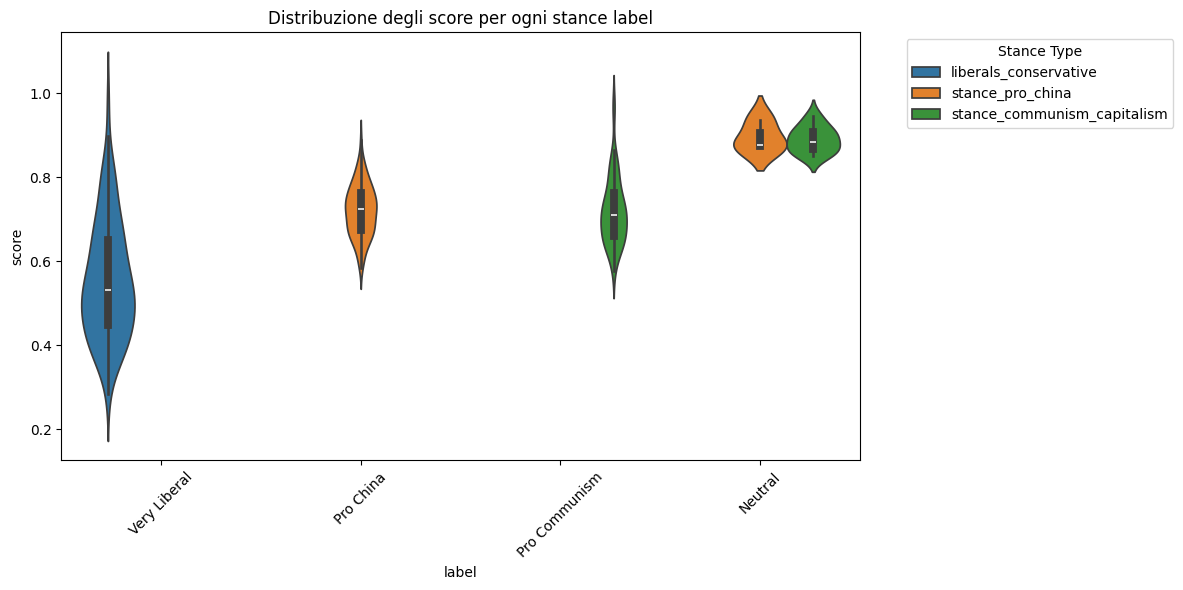

In [19]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricare i dati dal file JSON
data = df.to_dict(orient="records")

stance_data = []
for entry in data:
    for key, value in entry.items():
        if ("stance" in key or "liberals_conservative" in key) and isinstance(value, dict):
            stance_data.append({
                "stance_type": key,
                "label": value["label"],
                "score": value["score"] if type(value["score"]) == float else 1 - abs(value["score"][0] - value["score"][1])
            })

# Convertire in dataframe
df = pd.DataFrame(stance_data)

# Convertire il dataframe in un formato corretto
df["score"] = pd.to_numeric(df["score"], errors="coerce")  # Convertire gli score in numerico

# Controllare se ci sono valori NaN dopo la conversione
df = df.dropna(subset=["score"])  # Rimuovere eventuali valori non numerici

# Creare i grafici a violino
plt.figure(figsize=(12, 6))
sns.violinplot(x="label", y="score", hue="stance_type", data=df)
plt.title("Distribuzione degli score per ogni stance label")
plt.xticks(rotation=45)
plt.legend(title="Stance Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Mostrare il grafico
plt.show()



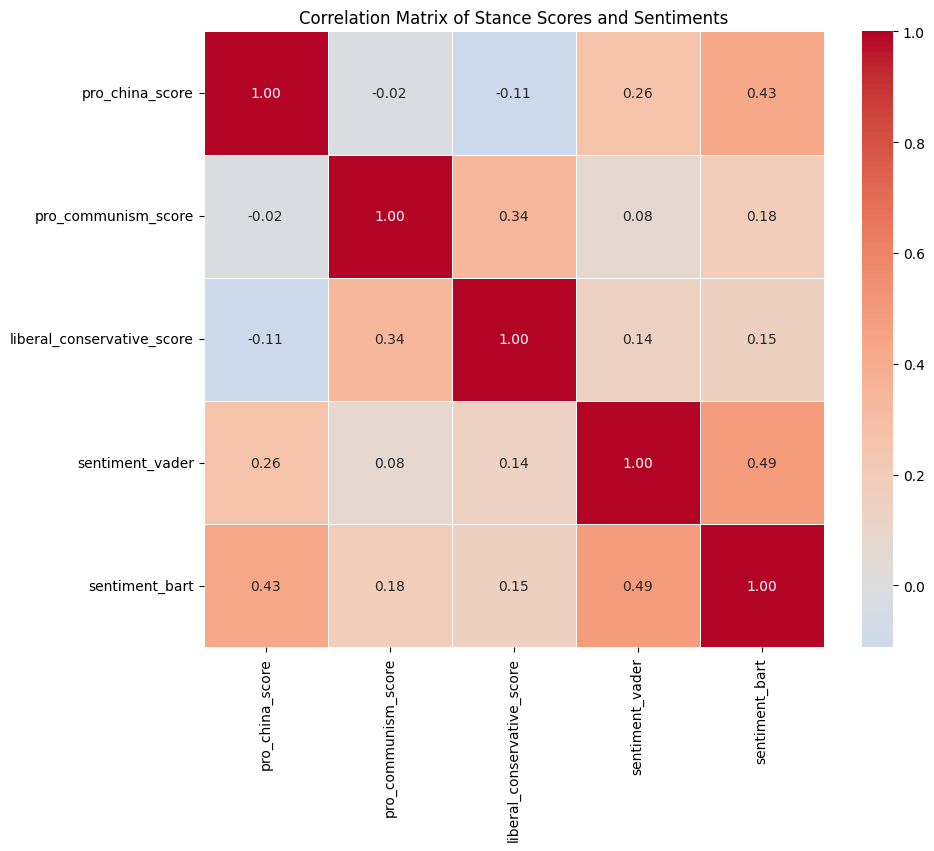

In [ ]:
# Converti in DataFrame
df = pd.DataFrame(data)
extract_score = lambda x: x["score"] if isinstance(x["score"], float) else 1 - abs(x["score"][0] - x["score"][1])
# Estrai gli score in colonne separate
df = df[df["stance_pro_china_label"] == "Pro China"]
df = df[df["stance_communism_capitalism_label"] == "Pro Communism"]
df["pro_china_score"] = df["stance_pro_china"].apply(extract_score)
df["pro_communism_score"] = df["stance_communism_capitalism"].apply(extract_score)
df["sentiment_vader"] = df["sentiment_vader"]
df["sentiment_bart"] = df["sentiment_bart"]

# Rimuovi eventuali valori nulli
df_cleaned = df.dropna(subset=["pro_china_score", "pro_communism_score", "liberal_conservative_score", "sentiment_vader", "sentiment_bart"])

# Calcola la matrice di correlazione
correlation_matrix = df_cleaned[["pro_china_score", "pro_communism_score", "liberal_conservative_score", "sentiment_vader", "sentiment_bart"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Stance Scores and Sentiments')
plt.show()

